### IMPORT LIBRARY YANG DIGUNAKAN ###
Pada tahap ini melakukan import library python yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import kagglehub

### MENDOWNLOAD DATASET DARI KAGGLE ###
Pada tahap ini adalah mendownload dataset yang berasal dari https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset menggunakan library kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/book-recommendation-dataset


### MELOAD DATASET YANG SUDAH DIDOWNLOAD ###
Tahap ini membuat variabel df_book. df_rating dan df_user untuk melakukan load dataset yang telah didownload

In [3]:
df_book = pd.read_csv(path + '/Books.csv')
df_rating = pd.read_csv(path + '/Ratings.csv')
df_user = pd.read_csv(path + '/Users.csv')

<ipython-input-3-7c6bf349c031>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_book = pd.read_csv(path + '/Books.csv')


### UNIVARIATE EXPLORATORY DATA ANALYSIS ###
Tahap ini dilakukan untuk memahami variabel-variabel pada dataset dan memeriksa missing value serta tipe data pada dataset yang digunakan

Eksplorasi variabel df_book

In [4]:
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


info() digunakan untuk melihat tipe data pada dataset

In [5]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


isna() untuk mengecek missing value pada kolom sedangkan sum() untuk menghitung jumlah missing value pada kolom. Pada dataset df_book terdapat missing value di kolom Book-Author, Publisher dan Image-URL-L

In [6]:
df_book.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


Eksplorasi variabel df_rating

In [7]:
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


info() digunakan untuk melihat tipe data pada dataset

In [8]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


isna() untuk mengecek missing value pada kolom sedangkan sum() untuk menghitung jumlah missing value pada kolom. Pada dataset df_rating tidak ada missing value

In [9]:
df_rating.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


Eksplorasi variabel df_user

In [10]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


info() digunakan untuk melihat tipe data pada dataset

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


isna() untuk mengecek missing value pada kolom sedangkan sum() untuk menghitung jumlah missing value pada kolom. Pada dataset df_user terdapat missing value di kolom Age.

In [12]:
df_user.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


### DATA PROCESSING ###
Tahap ini dilakukan untuk memproses dataset sebelum dilakukan modekung. Mulai dari penggabungan dataset yang digunakan dan filtering dataset

merge() digunakan untuk menggabungkan dataset rating dengan dataset book berdasarkan ISBN

In [13]:
df_all = df_rating.merge(df_book, on='ISBN')
df_all.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


melakukan filtering terhadap kolom Book-Rating agar rating sama dengan 0 akan dibuang

In [14]:
df_all = df_all[df_all['Book-Rating'] > 0]

### DATA PREPARATION ###
Tahap ini dilakukan dengan beberapa proses mulai dari menangani missing value, meencode dataset, menghitung jumlah unik dan melakukan splitting dataset

dropna() digunakan untuk menghilangkan missing value pada dataset

In [15]:
df_all = df_all.dropna()

LabelEncoder() meencode atau merubah dataset kategorik menjadi numerik

In [16]:
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df_all['user'] = user_encoder.fit_transform(df_all['User-ID'])
df_all['item'] = item_encoder.fit_transform(df_all['Book-Title'])

<ipython-input-16-3e7f7c78e942>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['user'] = user_encoder.fit_transform(df_all['User-ID'])


nunique() digunakan untuk menghitung jumalah data unik pada kolom user dan item

In [17]:
num_users = df_all['user'].nunique()
num_items = df_all['item'].nunique()

merubah Book-Rating suka (rating =>7) = 1, tidak suka (rating <7) = 0

In [18]:
df_all['liked'] = df_all['Book-Rating'].apply(lambda x: 1 if x >= 7 else 0)

membagi dataset menjadi train dan test

In [19]:
X = df_all[['user', 'item']].values
y = df_all['liked'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODEL DEVOLEPMENT DENGAN COLLABORATIVE FILTERING ###
Tahap yang dilakukan untuk melatih model

membuat class model RecomenderClassifier dengan keras model class

In [20]:
class RecommenderClassifier(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50, **kwargs):
        super(RecommenderClassifier, self).__init__(**kwargs)
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_size)
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_size)
        self.dense = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        x = tf.concat([user_vector, item_vector], axis=1)
        x = self.dense(x)
        output = self.output_layer(x)
        return output

melakukan compile pada model. Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan accuracy sebagai metrics evaluation karena proyek ini membuat model klasifikasi untuk memprediksi suka/tidak user.

In [21]:
model = RecommenderClassifier(num_users, num_items)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

proses training model menggunakan 10 epochs

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256
)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7678 - loss: 0.5283 - val_accuracy: 0.7847 - val_loss: 0.4757
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8519 - loss: 0.3452 - val_accuracy: 0.7652 - val_loss: 0.5206
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9012 - loss: 0.2426 - val_accuracy: 0.7488 - val_loss: 0.6045
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9200 - loss: 0.1881 - val_accuracy: 0.7416 - val_loss: 0.6803
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9335 - loss: 0.1539 - val_accuracy: 0.7344 - val_loss: 0.8037
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9442 - loss: 0.1300 - val_accuracy: 0.7253 - val_loss: 0.9312
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9552 - loss: 0.1067 - val_accuracy: 0.7190 - val_loss: 1.0514
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9642 - loss: 0.0881 -

visualiasasi proses training dengan memplot metrik evaluasi dengan matplotlib. hasil yang didapatkan model yang dibuat masih overfitting yang artinya model tidak belajr dengan baik pada data test.

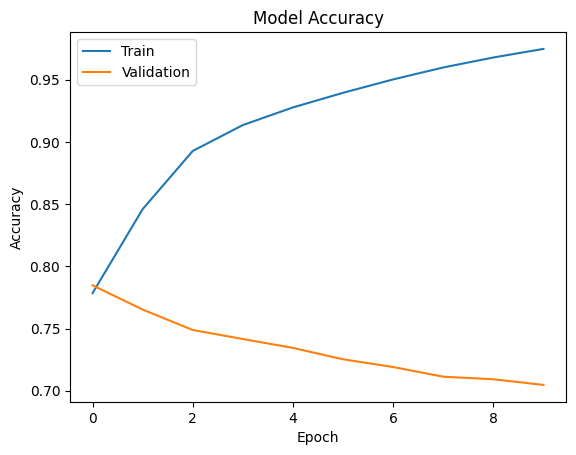

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

melakukan rekomendasi kemungkinan pengguna suka berdasarkan hasil model yang sudah dibuat. hasil yang didapatkan pengguna suka dengan buku yang direkomendasikan tetapi hasil ini belum maksimal karena model masih mengalami overfitting

In [24]:
def recommend_top_n(user_id, n=5):

    user_encoded = user_encoder.transform([user_id])
    all_items = np.array(range(num_items)).reshape(-1,1)
    user_input = np.column_stack((np.repeat(user_encoded, num_items), all_items.flatten()))
    probabilities = model.predict(user_input)

    # Create a DataFrame for recommendations
    recommendations = pd.DataFrame({'item': all_items.flatten(), 'probability': probabilities.flatten()})

    # Decode items back to book titles
    recommendations['Book-Title'] = item_encoder.inverse_transform(recommendations['item'])

    # Sort by probability and get top N
    top_recommendations = recommendations.sort_values('probability', ascending=False).head(n)

    return top_recommendations[['Book-Title', 'probability']]

# Example usage:
user_id_to_recommend = '276726' # Example user ID, replace with your desired user
recommendations = recommend_top_n(user_id_to_recommend, n=5)
recommendations


4237/4237 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


,Book-Title,probability
13983,Blackout,1.0
100760,The Cassandra Compact: A Covert-One Novel,1.0
44068,Growing Up,1.0
133350,"Wolves of the Calla (The Dark Tower, Book 5)",1.0
93462,Stiff: The Curious Lives of Human Cadavers,1.0
